# Dimensionality Reduction and Visualization

- Comparison of linear (PCA) and non-linear (t-SNE) dimensionality reduction on the Bike Sharing Rental dataset, including feature visualization and model performance (MSE, MAE). Used model are Random Forest and MLP.
- Visualization of the MNIST-784 dataset using Self-Organizing Maps (SOM) and discussion of insights.

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.io import arff

## 1. Comparing linear and non-linear DR

Loading the bike sharing data from dataset.arff

In [2]:
# Load and preprocess Bike Sharing dataset

def load_arff_dataset(path):
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    for col in df.select_dtypes([object]).columns:
        df[col] = df[col].apply(lambda x: x.decode() if isinstance(x, bytes) else x)
    return df, meta.names()

# Categorical columns
cat_cols = ['season', 'holiday', 'workingday', 'weather']

df_bike, attr_bike = load_arff_dataset('dataset.arff')
df_bike_enc = pd.get_dummies(df_bike, columns=cat_cols)
X_bike_features = df_bike_enc.drop(['count'], axis=1).values.astype(float)
y_bike = df_bike_enc['count'].values.astype(float)

Performing PCA and t-SNE with 2 components to diplay the result in 2D scatterplot.

In [3]:
# Apply PCA and t-SNE
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bike_features)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_bike_features)

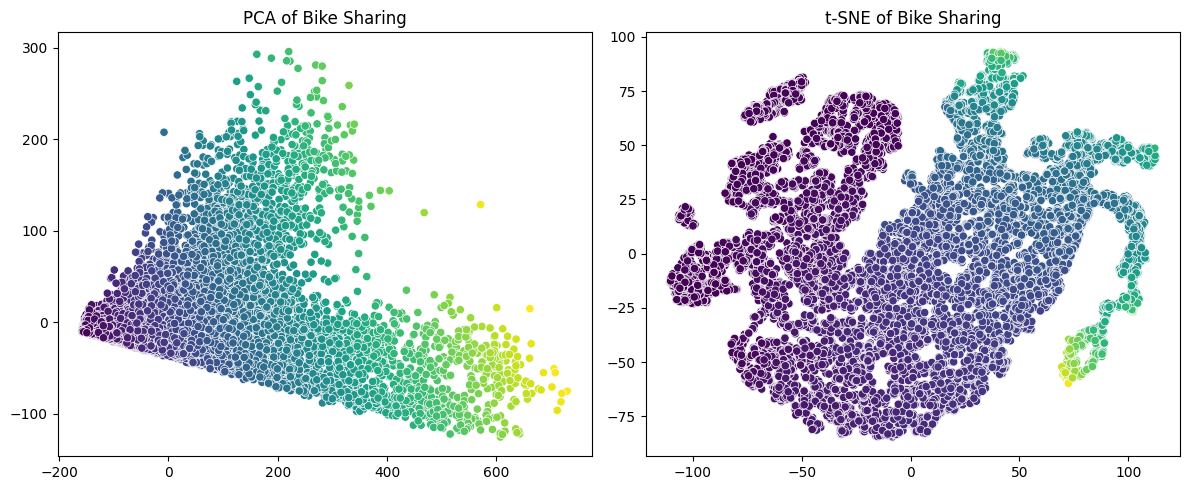

In [4]:
# Visualize PCA and t-SNE results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_bike, palette='viridis', legend=False)
plt.title('PCA of Bike Sharing')
plt.subplot(1,2,2)
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_bike, palette='viridis', legend=False)
plt.title('t-SNE of Bike Sharing')
plt.tight_layout()
plt.show()

Evaluating how models work with dimensional reduction from PCA and t-SNE.

In [ ]:
# Model evaluation function with MSE and MAE
def evaluate_model(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} - Random Forest: MSE={mse:.2f}, MAE={mae:.2f}')

    mlp = MLPRegressor(random_state=42, max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    mse_mlp = mean_squared_error(y_test, y_pred_mlp)
    mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
    print(f'{name} - MLP: MSE={mse_mlp:.2f}, MAE={mae_mlp:.2f}')

In [6]:
# Evaluate models on original, PCA, and t-SNE features
print('Model performance on original features:')
evaluate_model(X_bike_features, y_bike, 'Original')
print('Model performance on PCA features:')
evaluate_model(X_pca, y_bike, 'PCA')
print('Model performance on t-SNE features:')
evaluate_model(X_tsne, y_bike, 't-SNE')

Model performance on original features:
Original - Random Forest: MSE=7.48, MAE=0.95
Original - MLP: MSE=0.02, MAE=0.07
Model performance on PCA features:
PCA - Random Forest: MSE=6.12, MAE=1.14
PCA - MLP: MSE=1.13, MAE=0.84
Model performance on t-SNE features:
t-SNE - Random Forest: MSE=19.28, MAE=2.98
t-SNE - MLP: MSE=492.82, MAE=12.29


### Comparing PCA and t-SNE on Bike Sharing Rental Dataset

**Visualization:**
Both PCA (linear) and t-SNE (non-linear) reduce the dataset to 2D for visualization. However PCA captures global variance, while t-SNE focuses on local structure and can reveal clusters that PCA may miss. The scatter plots show how the total bike count is distributed in the reduced space.

**Model Performance:**
Models (Random Forest, MLP) are trained to predict total rental bikes using original, PCA, and t-SNE features.Performance is measured using Mean Squared Error (MSE), Mean Absolute Error (MAE). From the results it is clear that models perform best on original features, with PCA sometimes retaining enough information for good predictions. t-SNE is optimized for visualization and not prediction, so model performance has dropped. So to compare, PCA is useful for both visualization and as a preprocessing step for prediction, but t-SNE is best for visualizing complex, non-linear relationships but less suitable for predictive modeling.

## 2. Visualizing with SOM

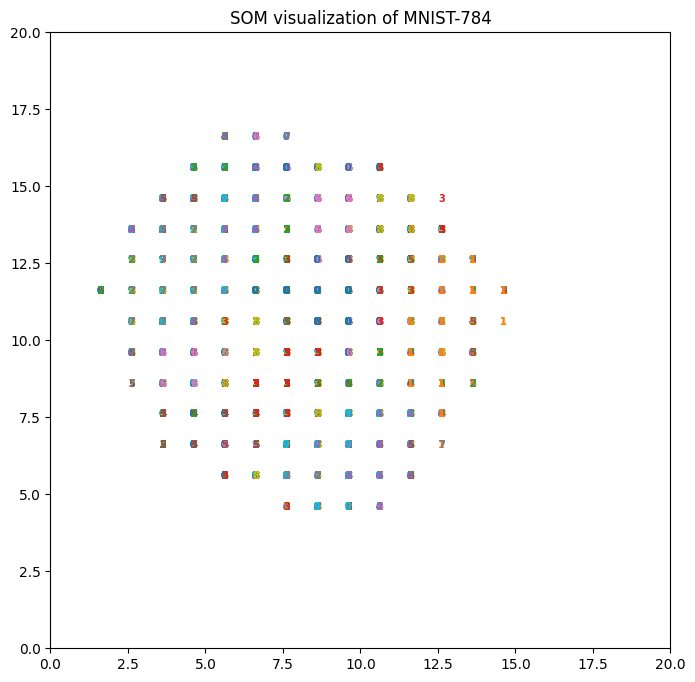

In [ ]:
# Self-Organizing Map (SOM) on MNIST-784 dataset
from minisom import MiniSom
df_mnist, attr_mnist = load_arff_dataset('mnist_784.arff')
X_mnist = df_mnist.drop(['class'], axis=1).values.astype(float)
y_mnist = df_mnist['class'].values.astype(int)
som_size = 20
som = MiniSom(som_size, som_size, X_mnist.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(X_mnist, 1000)
plt.figure(figsize=(8,8))
for i, x in enumerate(X_mnist):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5, str(y_mnist[i]), color=plt.cm.tab10(y_mnist[i]%10), fontdict={'weight': 'bold', 'size': 7})
plt.xlim([0, som_size])
plt.ylim([0, som_size])
plt.title('SOM visualization of MNIST-784')
plt.show()

### Visualizing MNIST-784 with SOM

**What can we learn from SOM visualization:**
SOM (Self-Organizing Map) projects high-dimensional MNIST data onto a 2D grid while preserving topological relationships. Each cell in the grid represents a cluster of similar digits and the visualization shows how digits are grouped. Digits with similar shapes or features tend to cluster together (e.g., 1 and 7, 3 and 8). SOM helps reveal structure in the data and can be used for unsupervised clustering and anomaly detection. This is good for visualizing and exploring high-dimensional data, especially for pattern recognition tasks like MNIST.